@misc{glass_identification_42,
  author       = {German, B.},
  title        = {{Glass Identification}},
  year         = {1987},
  howpublished = {UCI Machine Learning Repository},
  note         = {{DOI}: https://doi.org/10.24432/C5WW2P}
}

@misc{statlog_(vehicle_silhouettes)_149,
  author       = {Mowforth, Pete and Shepherd, Barry},
  title        = {{Statlog (Vehicle Silhouettes)}},
  howpublished = {UCI Machine Learning Repository},
  note         = {{DOI}: https://doi.org/10.24432/C5HG6N}
}

@misc{car_evaluation_19,
  author       = {Bohanec, Marko},
  title        = {{Car Evaluation}},
  year         = {1988},
  howpublished = {UCI Machine Learning Repository},
  note         = {{DOI}: https://doi.org/10.24432/C5JP48}
}

In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
glass_identification = fetch_ucirepo(id=42) 
  
# data (as pandas dataframes) 
glass_X = glass_identification.data.features 
glass_y = glass_identification.data.targets 
  
# metadata 
# print(glass_identification.metadata) 
  
# variable information 
# print(glass_identification.variables)

In [2]:
glass_X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [3]:
glass_y.value_counts()

Type_of_glass
2                76
1                70
7                29
3                17
5                13
6                 9
Name: count, dtype: int64

In [4]:
# fetch dataset 
statlog_vehicle_silhouettes = fetch_ucirepo(id=149) 
  
# data (as pandas dataframes) 
sil_X = statlog_vehicle_silhouettes.data.features 
sil_y = statlog_vehicle_silhouettes.data.targets 
  
# metadata 
# print(statlog_vehicle_silhouettes.metadata) 
  
# variable information 
# print(statlog_vehicle_silhouettes.variables)

In [5]:
sil_X

,COMPACTNESS,CIRCULARITY,DISTANCE CIRCULARITY,RADIUS RATIO,PR.AXIS ASPECT RATIO,MAX.LENGTH ASPECT RATIO,SCATTER RATIO,ELONGATEDNESS,PR.AXIS RECTANGULARITY,MAX.LENGTH RECTANGULARITY,SCALED VARIANCE ALONG MAJOR AXIS,SCALED VARIANCE ALONG MINOR AXIS,SCALED RADIUS OF GYRATION,SKEWNESS ABOUT MAJOR AXIS,SKEWNESS ABOUT MINOR AXIS,KURTOSIS ABOUT MINOR AXIS,KURTOSIS ABOUT MAJOR AXIS,HOLLOWS RATIO
0,95.0,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197
1,91.0,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199
2,104.0,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196
3,93.0,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207
4,85.0,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93.0,39,87,183,64,8,169,40,20,134,200,422,149,72,7,25,188,195
842,89.0,46,84,163,66,11,159,43,20,159,173,368,176,72,1,20,186,197
843,106.0,54,101,222,67,12,222,30,25,173,228,721,200,70,3,4,187,201
844,86.0,36,78,146,58,7,135,50,18,124,155,270,148,66,0,25,190,195


In [6]:
sil_y.value_counts()

class
bus      217
saab     217
opel     212
van      199
204        1
Name: count, dtype: int64

In [7]:
# # fetch dataset 
# car_evaluation = fetch_ucirepo(id=19) 
  
# # data (as pandas dataframes) 
# X = car_evaluation.data.features 
# y = car_evaluation.data.targets 
  
# # metadata 
# print(car_evaluation.metadata) 
  
# # variable information 
# print(car_evaluation.variables) 

In [8]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler

In [9]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split, StratifiedKFold
import random
import copy
from typing import Dict, List, Tuple, Optional
import matplotlib.pyplot as plt

In [10]:
# Set random seeds for reproducibility
def set_seed(seed=0):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)

In [11]:
# class ModelCheckpoint:
#     """Class to manage model state checkpoints for rollback capability"""
    
#     def __init__(self):
#         self.checkpoints = []  # List of (model_state, hidden_neurons, classes)
    
#     def save_checkpoint(self, model, hidden_neurons, current_classes):
#         """Save current model state"""
#         checkpoint = {
#             'model_state': copy.deepcopy(model.state_dict()),
#             'hidden_neurons': hidden_neurons,
#             'current_classes': current_classes.copy()
#         }
#         self.checkpoints.append(checkpoint)
    
#     def restore_previous(self, model):
#         """Restore previous model state"""
#         if len(self.checkpoints) < 2:  # Need at least 2 checkpoints to restore previous
#             return None, None, None
        
#         # Remove current checkpoint
#         current = self.checkpoints.pop()
#         # Get previous checkpoint
#         previous = self.checkpoints[-1]
        
#         # Restore model state
#         model.load_state_dict(previous['model_state'])
        
#         return previous['hidden_neurons'], previous['current_classes'], current
    
#     def get_latest(self):
#         """Get latest checkpoint"""
#         if not self.checkpoints:
#             return None
#         return self.checkpoints[-1]
    
#     def clear(self):
#         """Clear all checkpoints"""
#         self.checkpoints.clear()

In [379]:
class DynamicNetwork(nn.Module):
    """Dynamic neural network with growth control.
    
    mode = "reinit"   → reinitialize all weights on growth
    mode = "preserve" → copy old weights, init only new ones
    """
    
    def __init__(self, input_size, num_classes=2, hidden_neurons=0, mode="reinit"):
        super().__init__()
        assert mode in ["reinit", "preserve"], "mode must be 'reinit' or 'preserve'"
        
        self.input_size = input_size
        self.hidden_neurons = hidden_neurons
        self.num_classes = num_classes
        self.mode = mode
        self.activation = nn.ReLU()
        self._build_model()
        self.best_state = None
        self.best_metric = None
    
    def _build_model(self):
        """(Re)build network with current size"""
        if self.hidden_neurons == 0:
            self.hidden_layer = None
            self.output_layer = nn.Linear(self.input_size, self.num_classes)
            nn.init.xavier_uniform_(self.output_layer.weight)
        else:
            self.hidden_layer = nn.Linear(self.input_size, self.hidden_neurons)
            self.output_layer = nn.Linear(self.hidden_neurons, self.num_classes)
            nn.init.kaiming_normal_(self.hidden_layer.weight, nonlinearity="relu")
            nn.init.xavier_uniform_(self.output_layer.weight)

    def forward(self, x):
        if self.hidden_layer is None:
            return self.output_layer(x)
        else:
            hidden_output = self.activation(self.hidden_layer(x))
            return self.output_layer(hidden_output)
    
    def add_hidden_neuron(self, k=1):
        """Expand hidden neurons"""
        if self.mode == "reinit":
            self.hidden_neurons += k
            self._build_model()
            return
        
        # --- preserve mode ---
        old_hidden = self.hidden_layer
        old_output = self.output_layer
        new_hidden_neurons = self.hidden_neurons + k
        
        if self.hidden_neurons == 0:
            new_hidden = nn.Linear(self.input_size, new_hidden_neurons)
            new_output = nn.Linear(new_hidden_neurons, self.num_classes)
            nn.init.kaiming_normal_(new_hidden.weight, nonlinearity="relu")
            nn.init.xavier_uniform_(new_output.weight)
        
        else:
            new_hidden = nn.Linear(self.input_size, new_hidden_neurons)
            new_output = nn.Linear(new_hidden_neurons, self.num_classes)
            
            with torch.no_grad():
                # copy old hidden
                new_hidden.weight[:self.hidden_neurons, :] = old_hidden.weight.data.clone()
                new_hidden.bias[:self.hidden_neurons] = old_hidden.bias.data.clone()
                # init new
                nn.init.kaiming_normal_(new_hidden.weight[self.hidden_neurons:], nonlinearity="relu")
                nn.init.zeros_(new_hidden.bias[self.hidden_neurons:])
                
                # copy old output
                new_output.weight[:, :self.hidden_neurons] = old_output.weight.data.clone()
                new_output.bias = old_output.bias.clone()
                # init new output connections
                nn.init.xavier_uniform_(new_output.weight[:, self.hidden_neurons:])
        
        self.hidden_layer = new_hidden
        self.output_layer = new_output
        self.hidden_neurons = new_hidden_neurons
    
    def add_output_class(self, k=1):
        """Expand output classes"""
        if self.mode == "reinit":
            self.num_classes += k
            self._build_model()
            return
        
        # --- preserve mode ---
        old_output = self.output_layer
        new_num_classes = self.num_classes + k
        
        if self.hidden_neurons == 0:
            new_output = nn.Linear(self.input_size, new_num_classes)
        else:
            new_output = nn.Linear(self.hidden_neurons, new_num_classes)
        
        with torch.no_grad():
            # copy old
            new_output.weight[:self.num_classes, :] = old_output.weight.data.clone()
            new_output.bias[:self.num_classes] = old_output.bias.data.clone()
            # init new
            nn.init.xavier_uniform_(new_output.weight[self.num_classes:, :])
            nn.init.zeros_(new_output.bias[self.num_classes:])
        
        self.output_layer = new_output
        self.num_classes = new_num_classes

    def store(self, metric):
        if metric is not None or metric < self.best_metric:
            self.best_state = copy.deepcopy(self.state_dict())
            self.best_metric = metric

    def restore(self):
        self.load_state_dict(self.best_state)

In [380]:
def evaluate_model(model, features, labels, active_classes):
    """Evaluate model performance"""
    if len(features) == 0:
        return {}

    class_to_index = {cls: idx for idx, cls in enumerate(active_classes)}
    index_to_class = {idx: cls for idx, cls in enumerate(active_classes)}
    # print(class_to_index)
    model.eval()
    with torch.no_grad():
        features_tensor = torch.from_numpy(features.astype(np.float32))
        outputs = model(features_tensor)
        
        if outputs.shape[1] == 0:
            predictions = np.array([-1] * len(features))
        else:
            # print(outputs)
            _, predicted_indices = torch.max(outputs, 1)
            predicted_indices = predicted_indices.numpy()
            # print(predicted_indices)
            predictions = np.array([index_to_class.get(idx, -1) for idx in predicted_indices])
    # print(predictions)
    valid_mask = predictions != -1
    if np.sum(valid_mask) == 0:
        return {'accuracy': 0, 'f1_score': 0, 'predictions': predictions, "cross_entropy": -1}
    valid_predictions = predictions[valid_mask]
    valid_labels = labels[valid_mask]
    # print(valid_labels, valid_predictions)
    valid_mapped_labels = torch.tensor([class_to_index[int(label)] for label in valid_predictions])
    # print(outputs[valid_mask].shape)
    cross_entropy = F.cross_entropy(outputs[valid_mask], valid_mapped_labels).item()
    
    accuracy = accuracy_score(valid_labels, valid_predictions)
    f1 = f1_score(valid_labels, valid_predictions, average='macro', zero_division=0)
    
    return {'accuracy': accuracy, 'f1_score': f1, 'predictions': predictions, "cross_entropy": cross_entropy}

In [381]:
def detect_stagnation(loss_history, window=5, tolerance=0.001):
    """Detect if training has stagnated"""
    if len(loss_history) < window + 1:
        return False
    
    recent_losses = loss_history[-window:]
    changes = [abs(recent_losses[i] - recent_losses[i-1]) for i in range(1, len(recent_losses))]
    avg_change = np.mean(changes)
    
    return avg_change < tolerance

def is_increasing(losses, window=3, threshold=1e-5):
    if len(losses) < window:
        return False
    return np.all(np.diff(losses[-window:]) > threshold)

def fit_check(train, val, num_classes, patience_window=10):
    train_stag = detect_stagnation(train, window=patience_window, tolerance=0.0005)
    val_stag = detect_stagnation(val, window=patience_window, tolerance=0.0005)
    print("X",train_stag, val_stag, val[-1] < np.log(num_classes))

    # both stagnate but at a high error -> underfit
    underfit = train_stag and val_stag and val[-1] < np.log(num_classes)
    print("XX",train[-1], val[-1], (np.log(num_classes) * np.sqrt(1.5/len(val))))
    # train keeps decreasing while val stagnates above train at a specific gap -> overfit
    overfit = not train_stag and val_stag and train[-1] - val[-1] > (np.log(num_classes) * np.sqrt(1.5/len(val)))
    print("XXX",overfit, is_increasing(val, window=patience_window))
    # if val is increasing, overfit
    overfit = overfit or is_increasing(val, window=patience_window)
    return underfit, overfit

def train_model_with_architecture_search(model, train_loader, train_data, val_data, current_classes, 
                                       config, #checkpoint_manager=None, 
                                       stage_info=None, history=None):
    """
    Unified function to train model with architecture search and rollback capability
    
    Args:
        model: The neural network model
        train_loader: DataLoader for training data
        val_data: Validation data (X_val, y_val)
        current_classes: List of current classes being learned
        config: Configuration dictionary
        ewc: EWC regularizer (optional)
        checkpoint_manager: Model checkpoint manager
        stage_info: Information about current stage
        history: History tracking dictionary
        
    Returns:
        Trained model and updated history
    """
    X_val, y_val = val_data
    
    # Initialize training state
    hidden_neurons_added = 0
    max_hidden_neurons = config.get('max_hidden_neurons', 20)
    overfit = False
    underfit = False

    max_epochs = config.get('max_epochs', 100)
    learning_rate = config.get('learning_rate', 0.001)
    patience_window = config.get('patience', 15)

    class_to_index = {cls: idx for idx, cls in enumerate(current_classes)}
    
    while not overfit and hidden_neurons_added < max_hidden_neurons:
        if config.get('verbose', True):
            print(f"Training with {model.hidden_neurons} hidden neurons...")
        
        # Train the model
        optimizer = torch.optim.Adam(
            model.parameters(),
            lr=learning_rate,
            weight_decay=config.get('weight_decay', 1e-5)
        )
        
        training_history = {'train_loss': [], 'val_accuracy': [], 'val_f1': [], 'val_loss':[]}
        best_val_loss = 0
        best_model_state = None
        best_history = None
        
        for epoch in range(max_epochs):
            print(epoch)
            model.train()
            epoch_losses = []
            
            for batch_features, batch_labels in train_loader:
                optimizer.zero_grad()
                outputs = model(batch_features)
                
                mapped_labels = torch.tensor([class_to_index[int(label)] for label in batch_labels])
                
                loss = F.cross_entropy(outputs, mapped_labels)
                # print(loss)
                
                loss.backward()
                optimizer.step()
                epoch_losses.append(loss.item())

            # epoch_losses = []
            
            # for batch_features, batch_labels in train_loader:
            #     mapped_labels = torch.tensor([class_to_index[int(label)] for label in batch_labels])
            #     outputs = model(batch_features)
            #     loss = F.cross_entropy(outputs, mapped_labels)
            #     epoch_losses.append(loss.item())
            print(epoch_losses)
            avg_epoch_loss = np.mean(epoch_losses)
            training_history['train_loss'].append(avg_epoch_loss)
            
            # Evaluate on validation set
            val_results = evaluate_model(model, X_val, y_val, current_classes)
            val_accuracy = val_results.get('accuracy', 0)
            val_f1 = val_results.get('f1', 0)
            val_loss = val_results.get('cross_entropy', -1)
            
            training_history['val_accuracy'].append(val_accuracy)
            training_history['val_loss'].append(val_loss)
            training_history['val_f1'].append(val_f1)

            model.store(val_loss)
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                best_history = copy.deepcopy(training_history)

            underfit, overfit = fit_check(training_history['train_loss'], training_history['val_loss'], num_classes=len(current_classes),
                                         patience_window=patience_window)
    
            do_check = epoch > 0.4 * max_epochs

            if overfit:
            #     print('overfit',epoch)
            #     print(history['train_accuracy'][-5:])
            #     print(history['val_accuracy'][-5:])
                plt.plot(training_history['train_loss'])
                plt.plot(training_history['val_loss'])
                plt.show()
                overfit = True
                break
            
            if do_check and underfit:
                train_acc = training_history['train_accuracy'][-1]
                val_acc = training_history['val_accuracy'][-1]
                print(f'underfit on {epoch} : train:{train_acc:.3f}, val:{val_acc:.3f}')
                underfit = True
                break

        
        # Update history
        if history is not None and stage_info is not None and best_history is not None:
            history['stage'].append(stage_info['stage'])
            history['classes_so_far'].append(current_classes.copy())
            history['hidden_neurons'].append(model.hidden_neurons)
            history['val_accuracy'].append(best_history['val_accuracy'][-1])
            history['val_f1'].append(best_history['val_f1'][-1])
            history['training_loss'].append(best_history['train_loss'][-1])
            history['overfit'].append(overfit)
        
        if config.get('verbose', True):
            print(f"  Validation accuracy: {val_accuracy:.4f}")
        
        if overfit:
            if config.get('verbose', True):
                print("  Overfitting detected! Attempting rollback...")
            model.restore()
            break
            # # Try to rollback the model architecture
            # if model.rollback():
            #     if history is not None:
            #         history['rollbacks'].append(('hidden_neuron', model.hidden_neurons))
            #     if config.get('verbose', True):
            #         print(f"  Rolled back to {model.hidden_neurons} hidden neurons")
            #     break
            # else:
            #     if config.get('verbose', True):
            #         print("  Cannot rollback further")
            #     break
        
        if config.get('verbose', True):
            print("  Underfitting detected. Adding hidden neuron...")
        
        # Save checkpoint before adding neuron
        # if checkpoint_manager is not None:
        #     checkpoint_manager.save_checkpoint(model, model.hidden_neurons, current_classes)
        
        model.add_hidden_neuron()
        hidden_neurons_added += 1

        if config.get('model_mode', 'reinit') == 'preserve':
            max_epochs = config.get('fine_max_epochs', 30)
            learning_rate = config.get('fine_learning_rate', 0.0005)
            patience_window = config.get('fine_patience', 5)
        
        # Save checkpoint after adding neuron
        # if checkpoint_manager is not None:
        #     checkpoint_manager.save_checkpoint(model, model.hidden_neurons, current_classes)
    return model, overfit, underfit

In [382]:
def run_incremental_learning(X_train, y_train, config, X_val=None, y_val=None):
    """Main incremental learning function with unified training approach"""
    set_seed(config.get('seed', 42))
    
    classes, counts = np.unique(y_train, return_counts=True)
    class_order = [cls for cls, count in sorted(zip(classes, counts), key=lambda x: x[1])]
    
    initial_classes = class_order[:2]
    remaining_classes = class_order[2:]
    
    input_size = X_train.shape[1]
    model = DynamicNetwork(input_size=input_size, num_classes=len(initial_classes), mode=config.get('model_mode', 'reinit'))
    # ewc = EWCRegularizer(model) if approach == 'ewc' else None
    
    history = {
        'stage': [], 'classes_so_far': [], 'hidden_neurons': [],
        'val_accuracy': [], 'val_f1': [], 'training_loss': [],
        'overfit': [], 'rollbacks': []
    }
    
    current_classes = initial_classes.copy()
    # checkpoint_manager = ModelCheckpoint()
    
    # Process initial classes
    if config.get('verbose', True):
        print(f"\n=== Stage 1: Processing initial classes: {initial_classes} ===")
    
    train_mask = np.isin(y_train, current_classes).flatten()
    X_current = X_train[train_mask]
    y_current = y_train[train_mask]

    dataset = TensorDataset(
        torch.from_numpy(X_current.astype(np.float32)),
        torch.from_numpy(y_current.astype(np.int64))
    )
    train_loader = DataLoader(dataset, batch_size=config.get('batch_size', 32), shuffle=True)
    
    # Save initial state
    # checkpoint_manager.save_checkpoint(model, model.hidden_neurons, current_classes)
    
    # Train initial model with architecture search
    model, overfit, underfit = train_model_with_architecture_search(
        model=model,
        train_loader=train_loader,
        train_data=(X_train, y_train),
        val_data=(X_val, y_val),
        current_classes=current_classes,
        config=config,
        # ewc=ewc,
        # checkpoint_manager=checkpoint_manager,
        stage_info={'stage': 1, 'description': 'Initial classes'},
        history=history
    )
    
    # Process remaining classes
    for stage_idx, new_class in enumerate(remaining_classes, start=2):
        if config.get('verbose', True):
            print(f"\n=== Stage {stage_idx}: Adding class {new_class} ===")
        
        # Save checkpoint before adding new class
        # checkpoint_manager.save_checkpoint(model, model.hidden_neurons, current_classes)
        
        # Add new class
        current_classes.append(new_class)
        model.add_output_class(k=1)
        
        # Prepare training data for current classes
        train_mask = np.isin(y_train, current_classes).flatten()
        X_current = X_train[train_mask]
        y_current = y_train[train_mask]
        
        dataset = TensorDataset(
            torch.from_numpy(X_current.astype(np.float32)),
            torch.from_numpy(y_current.astype(np.int64))
        )
        train_loader = DataLoader(dataset, batch_size=config.get('batch_size', 32), shuffle=True)
        
        # Train with the new class
        model, overfit, underfit = train_model_with_architecture_search(
            model=model,
            train_loader=train_loader,
            train_data=(X_train, y_train),
            val_data=(X_val, y_val),
            current_classes=current_classes,
            config=config,
            # ewc=ewc,
            # checkpoint_manager=checkpoint_manager,
            stage_info={'stage': stage_idx, 'description': f'Added class {new_class}'},
            history=history
        )
        
        # Handle overfitting after class addition
        # if overfit:
        #     if config.get('verbose', True):
        #         print("  Overfitting detected after class addition! Rolling back...")
            
        #     # Restore previous state
        #     prev_hidden, prev_classes, _ = checkpoint_manager.restore_previous(model)
        #     if prev_hidden is not None:
        #         current_classes = prev_classes
        #         if history is not None:
        #             history['rollbacks'].append(('class_addition', new_class))
        #         if config.get('verbose', True):
        #             print(f"  Rolled back class {new_class}, current classes: {current_classes}")
        #     else:
        #         if config.get('verbose', True):
        #             print("  Cannot rollback further")
    
    return model, history

In [383]:
import pandas as pd
def run_comparison(X, y, config, n_folds=3):
    """
    Compare fine-tuning and EWC approaches using cross-validation.
    """
    # Set random seed for reproducibility
    set_seed(config.get('seed', 42))
    
    # Initialize stratified k-fold
    skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=config.get('seed', 42))

    X_all_train, X_all_test, y_all_train, y_all_test = train_test_split(
        X, y, test_size=0.2, stratify=y, shuffle=True, random_state=config.get('seed', 42)
    )

    # Store results for each approach
    results = {
        'fine_tune': {'val_accuracy': [], 'val_f1': [], 'hidden_neurons': []}
    }
    
    fold = 1
    for train_idx, val_idx in skf.split(X_all_train, y_all_train):
        print(f"\n{'='*50}")
        print(f"Running Fold {fold}/{n_folds}")
        print(f"{'='*50}")
        
        # Split data
        X_train, X_val = X_all_train[train_idx], X_all_train[val_idx]
        y_train, y_val = y_all_train[train_idx], y_all_train[val_idx]
        
        # Run fine-tuning approach
        print("Running fine-tuning approach...")
        model_ft, history_ft = run_incremental_learning(
            X_train, y_train, config, X_val, y_val
        )
        
        # Run EWC approach
        # print("Running EWC approach...")
        # model_ewc, history_ewc = run_incremental_learning(
        #     X_train, y_train, config, 'ewc', X_val, y_val
        # )
        
        # Evaluate on test set
        val_results_ft = evaluate_model(model_ft, X_val, y_val, history_ft['classes_so_far'][-1])
        # test_results_ewc = evaluate_model(model_ewc, X_test, y_test, history_ewc['classes_so_far'][-1])
        
        # Store results
        results['fine_tune']['val_accuracy'].append(history_ft['val_accuracy'][-1])
        results['fine_tune']['val_f1'].append(history_ft['val_f1'][-1])
        results['fine_tune']['hidden_neurons'].append(history_ft['hidden_neurons'][-1])
        
        # results['ewc']['val_accuracy'].append(history_ewc['val_accuracy'][-1])
        # results['ewc']['val_f1'].append(history_ewc['val_f1'][-1])
        # results['ewc']['hidden_neurons'].append(history_ewc['hidden_neurons'][-1])
        
        print(f"Fold {fold} Results:")
        print(f"  Fine-tune - Accuracy: {val_results_ft.get('accuracy', 0):.4f}, F1: {val_results_ft.get('f1_score', 0):.4f}")
        # print(f"  EWC       - Accuracy: {test_results_ewc.get('accuracy', 0):.4f}, F1: {test_results_ewc.get('f1_score', 0):.4f}")
        
        fold += 1
    
    # Calculate average performance
    for approach in results:
        results[approach]['mean_accuracy'] = np.mean(results[approach]['val_accuracy'])
        results[approach]['mean_f1'] = np.mean(results[approach]['val_f1'])
        results[approach]['mean_hidden_neurons'] = np.mean(results[approach]['hidden_neurons'])
        results[approach]['std_accuracy'] = np.std(results[approach]['val_accuracy'])
        results[approach]['std_f1'] = np.std(results[approach]['val_f1'])
    
    print(f"\n{'='*50}")
    print("Comparison Summary:")
    print(f"{'='*50}")
    print(f"Fine-tune - Accuracy: {results['fine_tune']['mean_accuracy']:.4f} (±{results['fine_tune']['std_accuracy']:.4f}), "
          f"F1: {results['fine_tune']['mean_f1']:.4f} (±{results['fine_tune']['std_f1']:.4f}), "
          f"Hidden Neurons: {results['fine_tune']['mean_hidden_neurons']:.1f}")
    # print(f"EWC       - Accuracy: {results['ewc']['mean_accuracy']:.4f} (±{results['ewc']['std_accuracy']:.4f}), "
    #       f"F1: {results['ewc']['mean_f1']:.4f} (±{results['ewc']['std_f1']:.4f}), "
    #       f"Hidden Neurons: {results['ewc']['mean_hidden_neurons']:.1f}")

    print(f"{'='*50}")
    print("TEST AGAINST BEST")
    
    return results

In [384]:
# Example configuration
default_config = {
    'seed': 42,
    'batch_size': 16,
    'learning_rate': 0.001,
    'fine_learning_rate': 0.0005,
    'weight_decay': 1e-5,
    'max_epochs': 120,
    'fine_max_epochs': 30,
    'patience': 15,
    'fine_patience': 5,
    'ewc_strength': 1.0,
    'max_hidden_neurons': 64,
    'verbose': True,
    'model_mode': 'reinit'
}


Running Fold 1/5
Running fine-tuning approach...

=== Stage 1: Processing initial classes: [6, 5] ===
Training with 0 hidden neurons...
0
[26.221805572509766]
X False False True
XX 26.221805572509766 0.0 0.8489284545103327
XXX False False
1
[26.143043518066406]
X False False True
XX 26.143043518066406 0.0 0.6002830669264718
XXX False False
2
[26.064273834228516]
X False False True
XX 26.064273834228516 0.0 0.4901290717342736
XXX False False
3
[25.985502243041992]
X False False True
XX 25.985502243041992 0.0 0.42446422725516636
XXX False False
4
[25.906734466552734]
X False False True
XX 25.906734466552734 0.0 0.37965234646378837
XXX False False
5
[25.82796859741211]
X False False True
XX 25.82796859741211 0.0 0.34657359027997264
XXX False False
6
[25.74919891357422]
X False False True
XX 25.74919891357422 0.0 0.3208647959315356
XXX False False
7
[25.67043113708496]
X False False True
XX 25.67043113708496 0.0 0.3001415334632359
XXX False False
8
[25.59166145324707]
X False False True
X

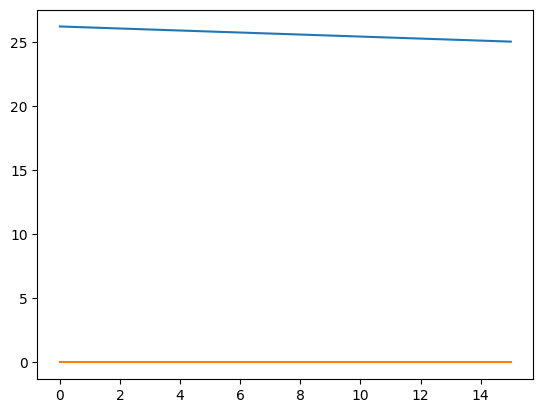

  Validation accuracy: 0.0571
  Overfitting detected! Attempting rollback...

=== Stage 2: Adding class 3 ===
Training with 0 hidden neurons...
0
[25.960079193115234, 22.083511352539062]
X False False True
XX 24.02179527282715 0.0 1.3455197661940432
XXX False False
1
[25.15155029296875, 23.095947265625]
X False False True
XX 24.123748779296875 3.4059794984386826e-09 0.951426150896346
XXX False False
2
[24.842832565307617, 23.07135772705078]
X False False True
XX 23.9570951461792 3.4059794984386826e-09 0.7768361992120933
XXX False False
3
[19.77560806274414, 32.54997634887695]
X False False True
XX 26.162792205810547 6.8119585527881554e-09 0.6727598830970216
XXX False False
4
[31.709306716918945, 8.082415580749512]
X False False True
XX 19.89586114883423 6.8119585527881554e-09 0.6017347324559009
XXX False False
5
[16.59033203125, 37.624664306640625]
X False False True
XX 27.107498168945312 1.0217937607137628e-08 0.5493061443340549
XXX False False
6
[23.94202423095703, 22.365766525268555

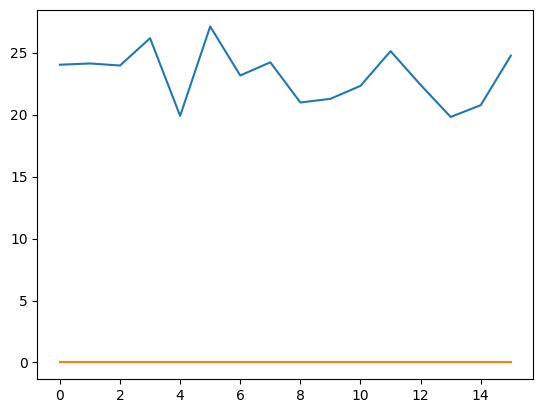

  Validation accuracy: 0.0857
  Overfitting detected! Attempting rollback...

=== Stage 3: Adding class 7 ===
Training with 0 hidden neurons...
0
[12.829181671142578, 15.487828254699707, 13.039263725280762]
X False False True
XX 13.78542455037435 0.0004733061068691313 1.6978569090206654
XXX False False
1
[18.819034576416016, 10.72213363647461, 9.692384719848633]
X False False True
XX 13.077850977579752 0.0008498082752339542 1.2005661338529436
XXX False False
2
[11.114943504333496, 18.15887451171875, 8.675461769104004]
X False False True
XX 12.649759928385416 0.0015042683808133006 0.9802581434685472
XXX False False
3
[12.973320007324219, 13.432785034179688, 11.908754348754883]
X False False True
XX 12.77161979675293 0.002654631854966283 0.8489284545103327
XXX False False
4
[14.376954078674316, 9.518119812011719, 14.51994800567627]
X False False True
XX 12.805007298787435 0.004643673542886972 0.7593046929275767
XXX False False
5
[9.581317901611328, 13.055322647094727, 15.164146423339844]

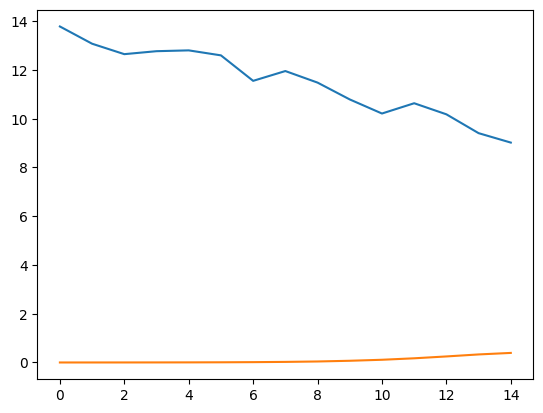

  Validation accuracy: 0.1429
  Overfitting detected! Attempting rollback...

=== Stage 4: Adding class 1 ===
Training with 0 hidden neurons...
0
[40.74001693725586, 43.99744415283203, 39.385765075683594, 45.59325408935547, 40.520179748535156, 40.21116256713867]
X False False True
XX 41.74130376180013 8.174349375167367e-08 1.9711508290768496
XXX False False
1
[46.04132080078125, 41.59539794921875, 32.66387176513672, 43.13904571533203, 40.050846099853516, 41.89644241333008]
X False False True
XX 40.897820790608726 3.1675591571911355e-07 1.3938141179817256
XXX False False
2
[33.63845443725586, 42.581790924072266, 45.120216369628906, 31.85004234313965, 43.5330810546875, 43.44976806640625]
X False False True
XX 40.0288921991984 9.707019898996805e-07 1.1380444617808732
XXX False False
3
[41.581199645996094, 43.6035041809082, 37.7014274597168, 37.032806396484375, 31.69980239868164, 41.65555191040039]
X False False True
XX 38.879048665364586 3.119855136901606e-06 0.9855754145384248
XXX False 

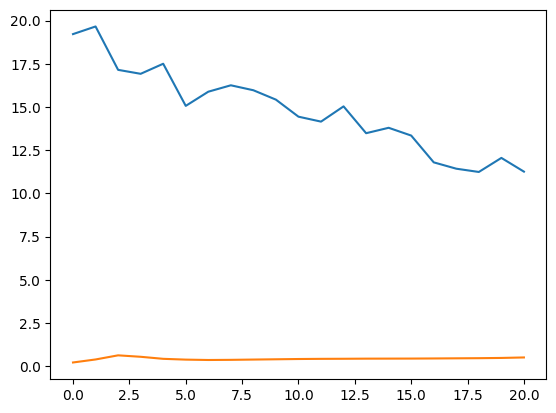

  Validation accuracy: 0.3143
  Overfitting detected! Attempting rollback...

=== Stage 5: Adding class 2 ===
Training with 1 hidden neurons...
0
[2.090599775314331, 2.6258554458618164, 2.73630690574646, 2.4202346801757812, 3.1308672428131104, 2.187127113342285, 2.7836201190948486, 2.985992670059204, 2.0541491508483887]
X False False True
XX 2.557194789250692 0.7856447696685791 2.1944482207043756
XXX False False
1
[2.137385845184326, 2.3410117626190186, 2.259923219680786, 2.3967738151550293, 2.1704132556915283, 1.8449763059616089, 2.5184824466705322, 2.3761918544769287, 2.063493490219116]
X False False True
XX 2.2342946661843195 1.068292498588562 1.5517092178228176
XXX False False
2
[2.246699810028076, 2.3480544090270996, 2.1020877361297607, 1.8583635091781616, 1.7122843265533447, 2.1200363636016846, 2.050926923751831, 1.969763159751892, 1.966007947921753]
X False False True
XX 2.041580465104845 1.243996262550354 1.2669652709463668
XXX False False
3
[2.220961093902588, 1.71996569633483

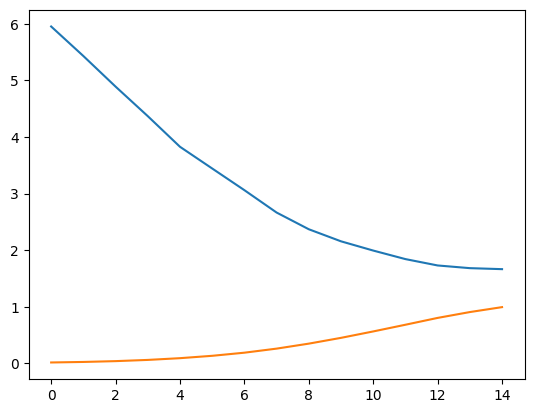

  Validation accuracy: 0.3143
  Overfitting detected! Attempting rollback...


IndexError: list index out of range

In [385]:
results = run_comparison(glass_X.to_numpy(), glass_y.to_numpy(), default_config, n_folds=5)

In [205]:
glass_y.value_counts()/len(glass_y)

Type_of_glass
2                0.355140
1                0.327103
7                0.135514
3                0.079439
5                0.060748
6                0.042056
Name: count, dtype: float64

In [250]:
# ====== Training with mini-batches ======
def train_model(model, X_train, y_train, X_val, y_val, classes, epochs=50, lr=0.01, batch_size=32, device="cpu", early_stopping=True):
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    # Create DataLoaders
    train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.long))
    val_dataset = TensorDataset(torch.tensor(X_val, dtype=torch.float32), torch.tensor(y_val, dtype=torch.long))
    
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    train_accs = []
    val_accs = []
    
    for epoch in range(epochs):
        model.train()
        for batch_features, batch_labels in train_loader:
            optimizer.zero_grad()
            outputs = model(batch_features)
            
            class_to_index = {cls: idx for idx, cls in enumerate(classes)}
            mapped_labels = torch.tensor([class_to_index[int(label)] for label in batch_labels])
            
            loss = F.cross_entropy(outputs, mapped_labels)
            
            loss.backward()
            optimizer.step()
        if early_stopping:
            # Validation
            train_accs.append(evaluate_model(model, X_train, y_train, classes).get('accuracy', 0))
            val_accs.append(evaluate_model(model, X_val, y_val, classes).get('accuracy', 0))
            ALPHA, BETA, GAMMA = 0.3, 0.75, 0.03
            _, overfit = fit_check(np.array(train_accs), np.array(val_accs),
                                  acceptable_gap=calculate_acceptable_gap(len(classes), len(y_val), ALPHA, BETA, GAMMA))
            
            if overfit:
                break
        val_acc = evaluate_model(model, X_val, y_val, classes).get('accuracy', 0)
        return val_acc


# ====== Cross-validation + hidden neuron search ======
def evaluate_with_kfold(X, y, max_hidden=10, n_splits=5, epochs=50, batch_size=16):

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42
    )
    
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    input_size = X.shape[1]
    num_classes = len(np.unique(y))
    device = "cuda" if torch.cuda.is_available() else "cpu"
    
    results = {}
    for hidden_units in range(0, max_hidden + 1):
        fold_acc = []
        for train_idx, val_idx in skf.split(X_train, y_train):
            model = DynamicNetwork(input_size=input_size, num_classes=num_classes).to(device)
            for _ in range(hidden_units):
                model.add_hidden_neuron()
            acc = train_model(
                model,
                X[train_idx], y[train_idx],
                X[val_idx], y[val_idx],
                np.unique(y),
                epochs=epochs,
                lr=0.01,
                batch_size=batch_size,
                device=device
            )
            fold_acc.append(acc)
        results[hidden_units] = np.mean(fold_acc)
        print(f"Hidden units: {hidden_units}, CV Accuracy: {results[hidden_units]:.4f}")
    
    best_hidden = max(results, key=results.get)
    print(f"\nBest hidden units: {best_hidden} with accuracy {results[best_hidden]:.4f}")

    model = DynamicNetwork(input_size=input_size, num_classes=num_classes).to(device)
    for _ in range(best_hidden):
        model.add_hidden_neuron()
    acc = train_model(
            model,
            X_train, y_train,
            X_test, y_test,
            np.unique(y),
            epochs=epochs,
            lr=0.01,
            batch_size=batch_size,
            device=device
        )
    print(acc)
    return results

In [253]:
evaluate_with_kfold(glass_X.to_numpy(), glass_y.to_numpy(), max_hidden=64, n_splits=5, epochs=100)

Hidden units: 0, CV Accuracy: 0.2091
Hidden units: 1, CV Accuracy: 0.2682
Hidden units: 2, CV Accuracy: 0.2118
Hidden units: 3, CV Accuracy: 0.2588
Hidden units: 4, CV Accuracy: 0.2624
Hidden units: 5, CV Accuracy: 0.3353
Hidden units: 6, CV Accuracy: 0.3383
Hidden units: 7, CV Accuracy: 0.2859
Hidden units: 8, CV Accuracy: 0.3271
Hidden units: 9, CV Accuracy: 0.3035
Hidden units: 10, CV Accuracy: 0.3982
Hidden units: 11, CV Accuracy: 0.2645
Hidden units: 12, CV Accuracy: 0.1855
Hidden units: 13, CV Accuracy: 0.2294
Hidden units: 14, CV Accuracy: 0.2266
Hidden units: 15, CV Accuracy: 0.4731
Hidden units: 16, CV Accuracy: 0.1918
Hidden units: 17, CV Accuracy: 0.2229
Hidden units: 18, CV Accuracy: 0.3968
Hidden units: 19, CV Accuracy: 0.4556
Hidden units: 20, CV Accuracy: 0.2528
Hidden units: 21, CV Accuracy: 0.3849
Hidden units: 22, CV Accuracy: 0.2975
Hidden units: 23, CV Accuracy: 0.4261
Hidden units: 24, CV Accuracy: 0.4613
Hidden units: 25, CV Accuracy: 0.2760
Hidden units: 26, CV A

{0: 0.2090756302521008,
 1: 0.268235294117647,
 2: 0.21176470588235294,
 3: 0.2588235294117647,
 4: 0.26235294117647057,
 5: 0.3352941176470588,
 6: 0.33831932773109247,
 7: 0.2858823529411765,
 8: 0.32705882352941174,
 9: 0.3035294117647059,
 10: 0.3981512605042017,
 11: 0.26453781512605046,
 12: 0.18554621848739497,
 13: 0.22941176470588234,
 14: 0.22655462184873948,
 15: 0.473109243697479,
 16: 0.19176470588235295,
 17: 0.22285714285714286,
 18: 0.39680672268907563,
 19: 0.4556302521008403,
 20: 0.25277310924369745,
 21: 0.3848739495798319,
 22: 0.29747899159663865,
 23: 0.4260504201680672,
 24: 0.461344537815126,
 25: 0.27596638655462186,
 26: 0.2907563025210084,
 27: 0.3682352941176471,
 28: 0.3848739495798319,
 29: 0.4094117647058823,
 30: 0.37411764705882355,
 31: 0.33815126050420163,
 32: 0.3403361344537815,
 33: 0.35865546218487393,
 34: 0.3045378151260504,
 35: 0.40336134453781514,
 36: 0.39764705882352935,
 37: 0.3447058823529412,
 38: 0.4329411764705883,
 39: 0.437815126050